In [ ]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from scipy import stats
import io

In [ ]:
df = pd.read_excel("/content/statistics_assignment_dataset.xlsm")

A.Create 2 dataframes out of this dataframe – 1 with all numerical variables and other with all categorical variables.

In [ ]:
# Select columns with numerical data types
df_numeric = df.select_dtypes(include=np.number)

# Select columns with categorical data types (in pandas, these are 'object')
df_categorical = df.select_dtypes(include='object')

print("--- Numerical DataFrame ---")
print(df_numeric.head())
print("\n" + "="*50 + "\n")


print("--- Categorical DataFrame ---")
print(df_categorical.head())
print("\n" + "="*50 + "\n")

--- Numerical DataFrame ---
   carat  depth  table  weight  size  price
0   0.23   61.5   55.0    3.95  3.98    326
1   0.21   59.8   61.0    3.89  3.84    326
2   0.23   56.9   65.0    4.05  4.07    327
3   0.29   62.4   58.0    4.20  4.23    334
4   0.31   63.3   58.0    4.34  4.35    335


--- Categorical DataFrame ---
       cut color clarity
0    Ideal     E     SI2
1  Premium     E     SI1
2     Good     E     VS1
3  Premium     I     VS2
4     Good     J     SI2




**B. Calculate the measure of central tendency of numerical variables using Pandas and statistics libraries and check if the calculated values are different between these 2 libraries.**

In [ ]:
# B. Calculate the measure of central tendency and compare libraries.

# 1. Using Pandas
pandas_mean = df_numeric.mean()
pandas_median = df_numeric.median()
pandas_mode = df_numeric.mode().iloc[0] # .mode() can return multiple rows, we take the first.

# 2. Using Statistics Library
stats_mean = {col: statistics.mean(df_numeric[col]) for col in df_numeric.columns}
stats_median = {col: statistics.median(df_numeric[col]) for col in df_numeric.columns}
stats_mode = {col: statistics.mode(df_numeric[col]) for col in df_numeric.columns}

# 3. Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Pandas Mean': pandas_mean,
    'Statistics Mean': pd.Series(stats_mean),
    'Pandas Median': pandas_median,
    'Statistics Median': pd.Series(stats_median),
    'Pandas Mode': pandas_mode,
    'Statistics Mode': pd.Series(stats_mode)
})

print("--- Comparison of Central Tendency Measures ---")
print(comparison_df)
print("\nConclusion: The calculated values for mean, median, and mode are identical between Pandas and the statistics library.")
print("\n" + "="*50 + "\n")

--- Comparison of Central Tendency Measures ---
        Pandas Mean  Statistics Mean  Pandas Median  Statistics Median  \
carat      0.797940         0.797940           0.70               0.70   
depth     61.749405        61.749405          61.80              61.80   
table     57.457184        57.457184          57.00              57.00   
weight     5.731157         5.731157           5.70               5.70   
size       5.734526         5.734526           5.71               5.71   
price   3932.799722      3932.799722        2401.00            2401.00   

        Pandas Mode  Statistics Mode  
carat          0.30             0.30  
depth         62.00            62.00  
table         56.00            56.00  
weight         4.37             4.37  
size           4.34             4.34  
price        605.00           605.00  

Conclusion: The calculated values for mean, median, and mode are identical between Pandas and the statistics library.




**C .Check the skewness of all numeric variables. Mention against each variable if its highly skewed/light skewed/ Moderately skwewed.**

In [ ]:
# C. Check the skewness of all numeric variables.
skew_values = df_numeric.skew()

print("--- Skewness of Numeric Variables ---")
for col, skewness in skew_values.items():
    if skewness > 1 or skewness < -1:
        interpretation = "Highly skewed"
    elif (skewness >= 0.5 and skewness <= 1) or (skewness <= -0.5 and skewness >= -1):
        interpretation = "Moderately skewed"
    else:
        interpretation = "Lightly skewed / Symmetrical"

    print(f"{col}: {skewness:.4f} ({interpretation})")
print("\n" + "="*50 + "\n")

carat     1.116646
depth    -0.082294
table     0.796896
weight    0.378676
size      2.434167
price     1.618395
dtype: float64
--- Skewness of Numeric Variables ---
carat: 1.1166 (Highly skewed)
depth: -0.0823 (Lightly skewed / Symmetrical)
table: 0.7969 (Moderately skewed)
weight: 0.3787 (Lightly skewed / Symmetrical)
size: 2.4342 (Highly skewed)
price: 1.6184 (Highly skewed)




**D. Use the different transformation techniques to convert skewed data found in previous question into normal distribution.**

--- Applying Log Transformation to Highly Skewed Variables ---


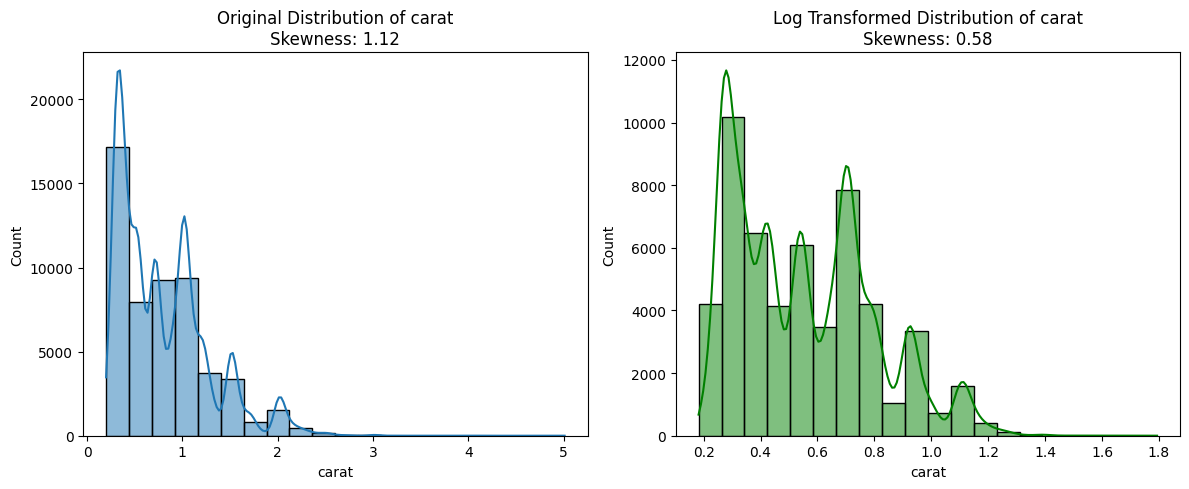

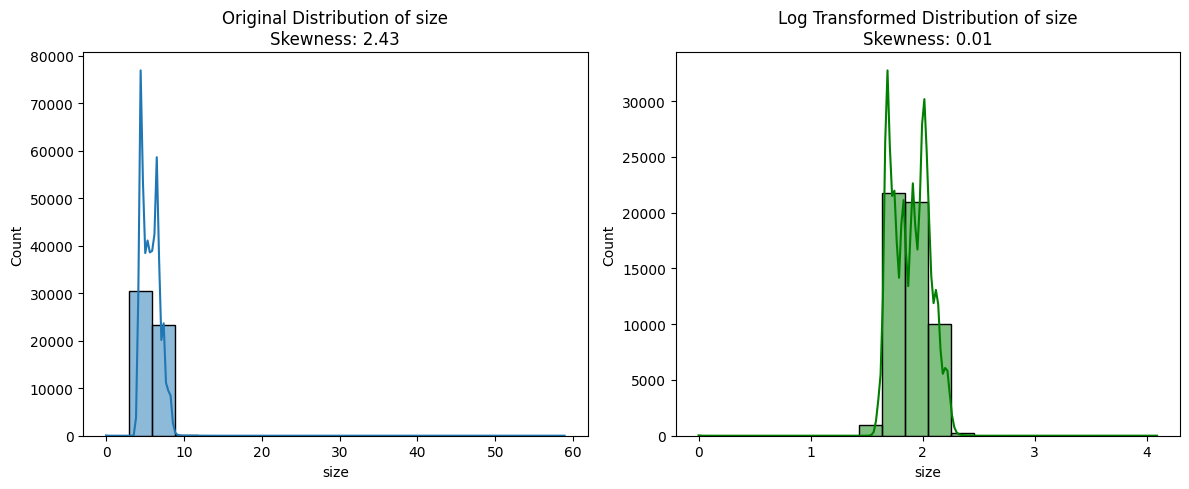

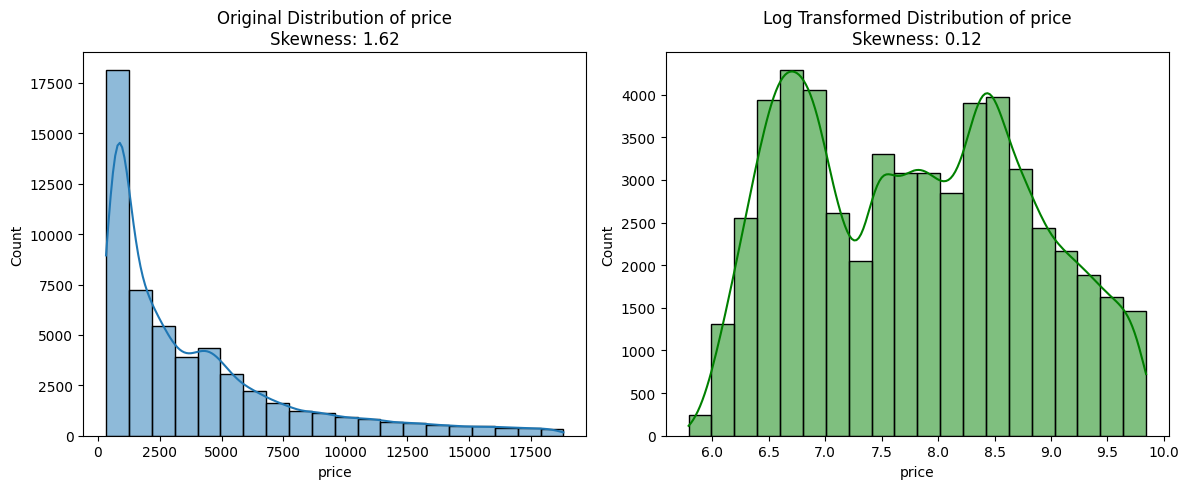

In [18]:
# D. Use transformation techniques to convert skewed data into normal distribution.
# We will transform 'carat', 'size', and 'price' based on the skewness results.

highly_skewed_cols = ['carat', 'size', 'price']
print("--- Applying Log Transformation to Highly Skewed Variables ---")

for col in highly_skewed_cols:
    # Make a copy of the column to transform
    transformed_col = df_numeric[col].copy()

    # Calculate original skewness
    original_skew = transformed_col.skew()

    # Apply the log transformation (log1p is used to handle potential 0 values gracefully)
    log_transformed_col = np.log1p(transformed_col)

    # Calculate transformed skewness
    transformed_skew = log_transformed_col.skew()

    # Plotting the comparison
    plt.figure(figsize=(12, 5))

    # Original Distribution
    plt.subplot(1, 2, 1)
    sns.histplot(transformed_col, kde=True, bins=20)
    plt.title(f'Original Distribution of {col}\nSkewness: {original_skew:.2f}')

    # Transformed Distribution
    plt.subplot(1, 2, 2)
    sns.histplot(log_transformed_col, kde=True, color='green', bins=20)
    plt.title(f'Log Transformed Distribution of {col}\nSkewness: {transformed_skew:.2f}')

    plt.tight_layout()
    plt.show()

--- Applying Box-Cox Transformation to 'carat' ---
Optimal Lambda (λ) found for 'carat': -0.0949


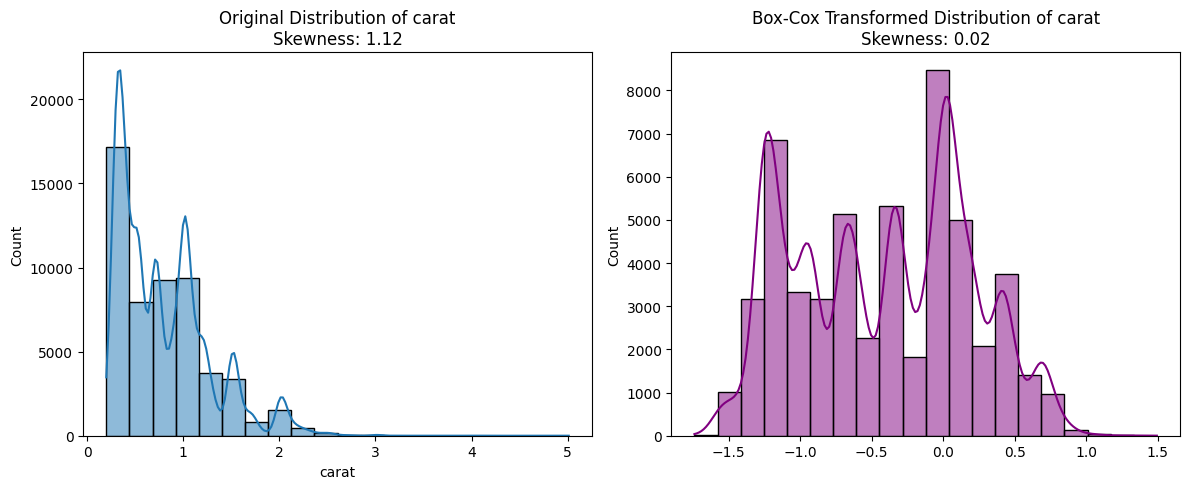

--- Skipping Box-Cox Transformation for 'size' ---
Column 'size' contains non-positive values, which are not supported by Box-Cox.
------------------------------
--- Applying Box-Cox Transformation to 'price' ---
Optimal Lambda (λ) found for 'price': -0.0670


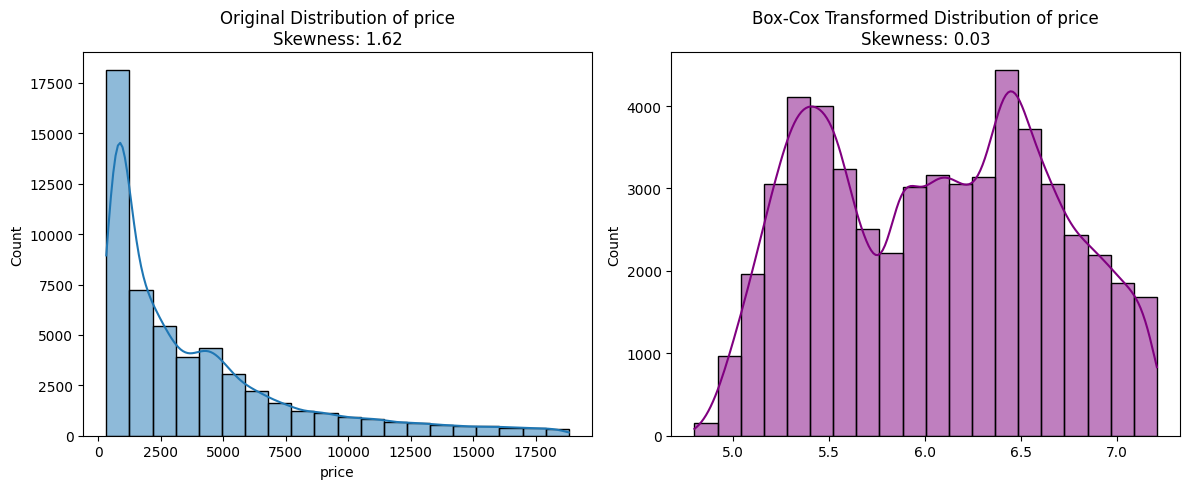

In [21]:
# Apply Box-Cox transformation to the 'price' variable
from scipy import stats


for col in highly_skewed_cols:
  # Check if the column contains only positive values before applying Box-Cox
  if (df_numeric[col] > 0).all():
    # The function returns the transformed data and the optimal lambda (λ)
    transformed_data, optimal_lambda = stats.boxcox(df_numeric[col])

    # Calculate skewness of the transformed data
    boxcox_skew = pd.Series(transformed_data).skew()

    print(f"--- Applying Box-Cox Transformation to '{col}' ---")
    print(f"Optimal Lambda (λ) found for '{col}': {optimal_lambda:.4f}")

    # Plotting the comparison
    plt.figure(figsize=(12, 5))

    # Original Distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df_numeric[col], kde=True, bins=20)
    plt.title(f'Original Distribution of {col}\nSkewness: {df_numeric[col].skew():.2f}')

    # Box-Cox Transformed Distribution
    plt.subplot(1, 2, 2)
    sns.histplot(transformed_data, kde=True, color='purple', bins=20)
    plt.title(f'Box-Cox Transformed Distribution of {col}\nSkewness: {boxcox_skew:.2f}')

    plt.tight_layout()
    plt.show()
  else:
    print(f"--- Skipping Box-Cox Transformation for '{col}' ---")
    print(f"Column '{col}' contains non-positive values, which are not supported by Box-Cox.")
    print("-" * 30)

**E.Create a user defined function in python to check the outliers using IQR
method. Then pass all numeric variables in that function to check outliers.**

In [13]:
# E. Create a user defined function to check outliers using IQR method.

def check_outliers_iqr(data, column):
    """
    Checks for outliers in a given column of a DataFrame using the IQR method.
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    print(f"--- Outlier Check for '{column}' ---")
    if not outliers.empty:
        print(f"Found {len(outliers)} outliers (values outside {lower_bound:.2f} and {upper_bound:.2f}):")
        print(outliers[[column]])
    else:
        print("No outliers found.")
    print("-" * 30)

print("--- Checking for Outliers in All Numeric Variables ---")
for col in df_numeric.columns:
    check_outliers_iqr(df_numeric, col)
print("\n" + "="*50 + "\n")

--- Checking for Outliers in All Numeric Variables ---
--- Outlier Check for 'carat' ---
Found 1889 outliers (values outside -0.56 and 2.00):
       carat
12246   2.06
13002   2.14
13118   2.15
13757   2.22
13991   2.01
...      ...
27741   2.15
27742   2.04
27744   2.29
27746   2.07
27749   2.29

[1889 rows x 1 columns]
------------------------------
--- Outlier Check for 'depth' ---
Found 2545 outliers (values outside 58.75 and 64.75):
       depth
2       56.9
8       65.1
24      58.1
35      58.2
42      65.2
...      ...
53882   65.4
53886   58.0
53890   57.9
53895   57.8
53927   58.1

[2545 rows x 1 columns]
------------------------------
--- Outlier Check for 'table' ---
Found 605 outliers (values outside 51.50 and 63.50):
       table
2       65.0
91      69.0
145     64.0
219     64.0
227     67.0
...      ...
53695   65.0
53697   65.0
53756   64.0
53757   64.0
53785   65.0

[605 rows x 1 columns]
------------------------------
--- Outlier Check for 'weight' ---
Found 32 outl

**F .Convert categorical variables into numerical variables using LabelEncoder technique.**


In [14]:
# F. Convert categorical variables into numerical variables using LabelEncoder.

# Create a copy to preserve the original categorical dataframe
df_categorical_encoded = df_categorical.copy()

# Initialize the encoder
le = LabelEncoder()

# Apply the encoder to each column
for col in df_categorical_encoded.columns:
    df_categorical_encoded[col] = le.fit_transform(df_categorical_encoded[col])

print("--- Original Categorical Data ---")
print(df_categorical.head())
print("\n--- Label Encoded Categorical Data ---")
print(df_categorical_encoded.head())
print("\n" + "="*50 + "\n")

--- Original Categorical Data ---
       cut color clarity
0    Ideal     E     SI2
1  Premium     E     SI1
2     Good     E     VS1
3  Premium     I     VS2
4     Good     J     SI2

--- Label Encoded Categorical Data ---
   cut  color  clarity
0    2      1        3
1    3      1        2
2    1      1        4
3    3      5        5
4    1      6        3




**G. Use both the feature scaling techniques (standardscaler/min max scaler) on all the variables.**

In [15]:
# G. Use both the feature scaling techniques on all the variables.

# First, combine the numeric and encoded categorical dataframes
df_combined = pd.concat([df_numeric, df_categorical_encoded], axis=1)

# 1. StandardScaler
scaler_std = StandardScaler()
df_standard_scaled = pd.DataFrame(scaler_std.fit_transform(df_combined), columns=df_combined.columns)

# 2. MinMaxScaler
scaler_minmax = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(df_combined), columns=df_combined.columns)

print("--- Data Scaled with StandardScaler (Mean=0, Std=1) ---")
print(df_standard_scaled.head())
print("\n--- Data Scaled with MinMaxScaler (Range 0 to 1) ---")
print(df_minmax_scaled.head())
print("\n" + "="*50 + "\n")

--- Data Scaled with StandardScaler (Mean=0, Std=1) ---
      carat     depth     table    weight      size     price       cut  \
0 -1.198168 -0.174092 -1.099672 -1.587837 -1.536196 -0.904095 -0.538099   
1 -1.240361 -1.360738  1.585529 -1.641325 -1.658774 -0.904095  0.434949   
2 -1.198168 -3.385019  3.375663 -1.498691 -1.457395 -0.903844 -1.511147   
3 -1.071587  0.454133  0.242928 -1.364971 -1.317305 -0.902090  0.434949   
4 -1.029394  1.082358  0.242928 -1.240167 -1.212238 -0.901839 -1.511147   

      color   clarity  
0 -0.937163 -0.484264  
1 -0.937163 -1.064117  
2 -0.937163  0.095589  
3  1.414272  0.675442  
4  2.002131 -0.484264  

--- Data Scaled with MinMaxScaler (Range 0 to 1) ---
      carat     depth     table    weight      size     price   cut     color  \
0  0.006237  0.513889  0.230769  0.367784  0.067572  0.000000  0.50  0.166667   
1  0.002079  0.466667  0.346154  0.362197  0.065195  0.000000  0.75  0.166667   
2  0.006237  0.386111  0.423077  0.377095  0.069100 

**H.Create the Histogram for all numeric variables and draw the KDE plot on that.**

--- Histograms with KDE for Numeric Variables ---


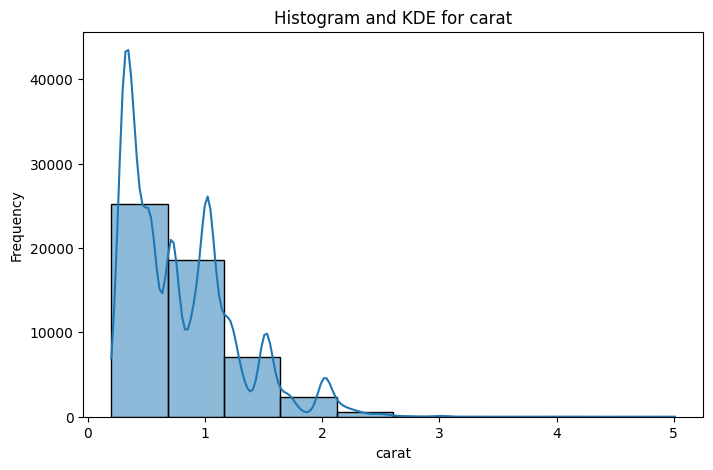

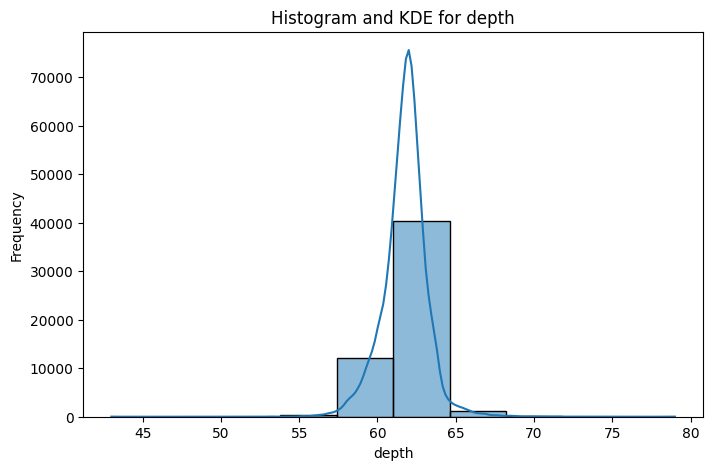

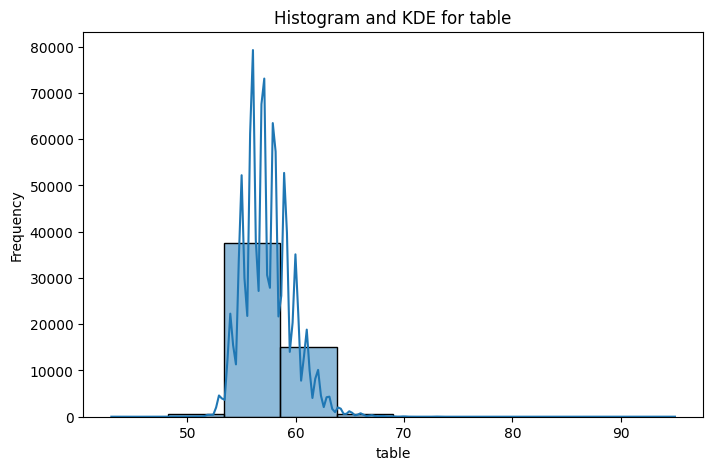

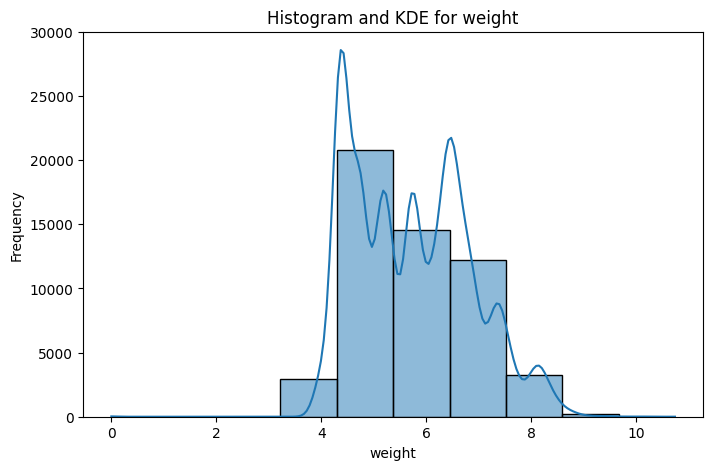

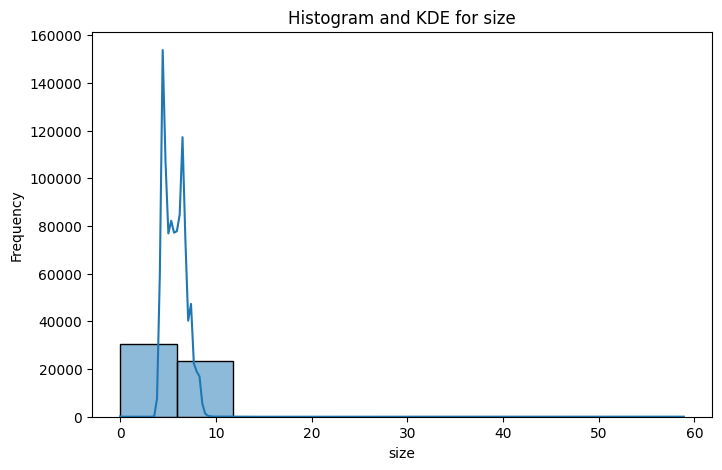

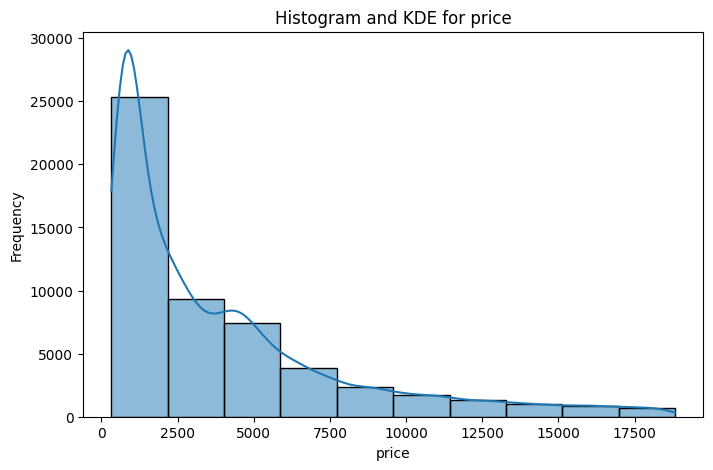

In [16]:
# H. Create the Histogram for all numeric variables and draw the KDE plot on that.
print("--- Histograms with KDE for Numeric Variables ---")

for col in df_numeric.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_numeric[col], kde=True, bins=10)
    plt.title(f'Histogram and KDE for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
print("\n" + "="*50 + "\n")

**I. Check the correlation between all the numeric variables using HeatMap and try to draw some conclusion about the data.**

--- Correlation Heatmap for Numeric Variables ---


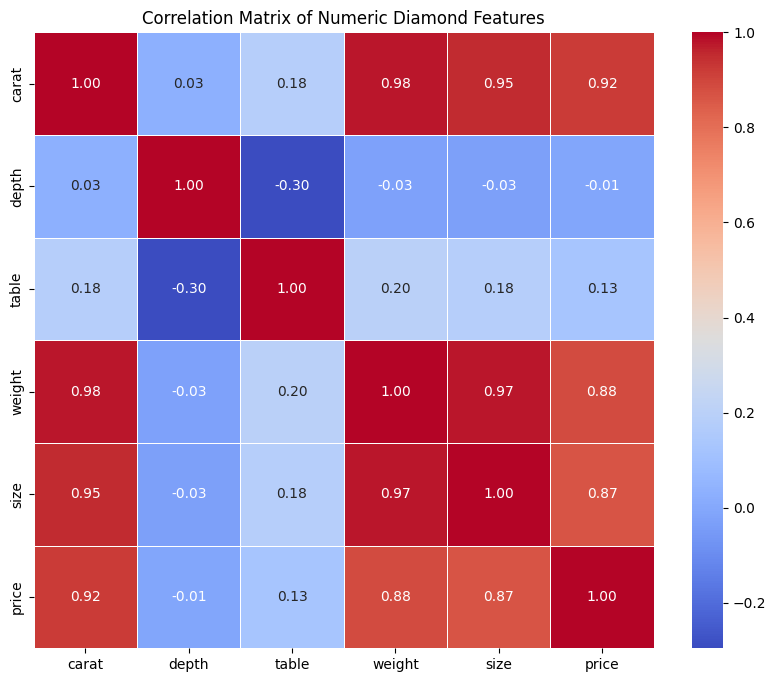


--- Conclusion from the Heatmap ---
1.  **Strong Positive Correlation:** There is a very strong positive correlation between `carat`, `weight`, `size`, and `price`. This is expected, as heavier and larger diamonds (`carat`, `weight`, `size`) are typically much more expensive (`price`). The correlation coefficients are all above 0.9.
2.  **Moderate Correlation:** `table` and `depth` show very weak or negligible correlation with `price` and other features in this small dataset.
3.  **Redundancy:** The variables `carat`, `weight`, and `size` are highly correlated with each other (correlation > 0.98). This suggests they measure a similar underlying property (the diamond's physical size) and might be redundant. In a machine learning model, one might consider keeping only one of these to avoid multicollinearity.



In [17]:
# I. Check the correlation between all the numeric variables using HeatMap.
print("--- Correlation Heatmap for Numeric Variables ---")

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Diamond Features')
plt.show()

print("""
--- Conclusion from the Heatmap ---
1.  **Strong Positive Correlation:** There is a very strong positive correlation between `carat`, `weight`, `size`, and `price`. This is expected, as heavier and larger diamonds (`carat`, `weight`, `size`) are typically much more expensive (`price`). The correlation coefficients are all above 0.9.
2.  **Moderate Correlation:** `table` and `depth` show very weak or negligible correlation with `price` and other features in this small dataset.
3.  **Redundancy:** The variables `carat`, `weight`, and `size` are highly correlated with each other (correlation > 0.98). This suggests they measure a similar underlying property (the diamond's physical size) and might be redundant. In a machine learning model, one might consider keeping only one of these to avoid multicollinearity.
""")